https://www.tensorflow.org/tutorials/keras/regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

2.4.1


In [9]:
dataset = raw_dataset.copy()
dataset = dataset.dropna()
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')

# Train test split
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset  = dataset.drop(train_dataset.index)

# Split off labels
trainX = train_dataset.copy()
trainY = trainX.pop('MPG')
testX  = test_dataset.copy()
testY  = testX.pop('MPG')

In [10]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(trainX))

def build_and_compile_model(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                  optimizer=tf.keras.optimizers.Adam(0.001))
    return model

In [12]:
dnn_horsepower_model = build_and_compile_model(normalizer)

history = dnn_horsepower_model.fit(
    trainX, 
    trainY,
    validation_split=0.2,
    verbose=0, 
    epochs=100
)

Epoch 1/100
8/8 [==============================] - 0s 21ms/step - loss: 23.4111 - val_loss: 23.0979
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 22.3429 - val_loss: 22.4000
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 21.4185 - val_loss: 21.5717
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 20.8571 - val_loss: 20.5145
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 19.7223 - val_loss: 19.1016
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 18.8688 - val_loss: 17.2677
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 16.7403 - val_loss: 15.2450
Epoch 8/100
8/8 [==============================] - 0s 7ms/step - loss: 14.7592 - val_loss: 13.5093
Epoch 9/100
8/8 [==============================] - 0s 7ms/step - loss: 12.1231 - val_loss: 11.2768
Epoch 10/100
8/8 [==============================] - 0s 7ms/step - loss: 10.0624 - val_loss: 8.2862
Epoch 11/

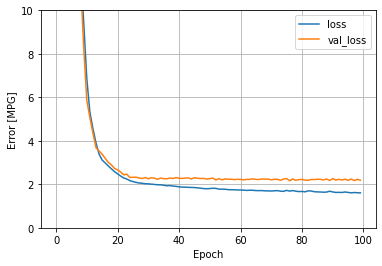

In [13]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)
    
plot_loss(history)